# <center> Surviving The Titanic
## <center> Kevin H. Bhimani and Trevor W. Stephens

This is a machine learning algorithm to predict the survival of passengers on the Titanic based on a number of factors collected from a Kaggle dataset (https://www.kaggle.com/c/titanic/data). In this project, we used both logistic regression and gaussian naive to develop our machine learning algorithm. 

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


data = pd.read_csv("train.csv")

#data.sample(5)
#data.info()

In [115]:
reg_data = data[["Survived","Pclass","Sex","Age","Parch","Ticket","Fare","Embarked"]]

reg_data.dropna(axis=0, how ='any', thresh=None, subset=None, inplace=True)

reg_data = reg_data.replace(to_replace = "male", value ="1.0")
reg_data = reg_data.replace(to_replace = "female", value ="2.0")
reg_data.head(5)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Survived,Pclass,Sex,Age,Parch,Ticket,Fare,Embarked
0,0,3,1.0,22.0,0,A/5 21171,7.2500,S
1,1,1,2.0,38.0,0,PC 17599,71.2833,C
2,1,3,2.0,26.0,0,STON/O2. 3101282,7.9250,S
3,1,1,2.0,35.0,0,113803,53.1000,S
4,0,3,1.0,35.0,0,373450,8.0500,S


In this model we use seven predictors to predict if a passegner survived.
  * Pclass - The class of the ticket purchased by the passenger. 1 = 1st class, 2 = 2nd class, 3 = 3rd class
  * Sex - The sex of the passenger. 1.0 = male, 2.0 = female
  * Age - The sex of the passenger. 1.0 = male, 2.0 = female
  * Parch - The number of parents and children that a passenger had on the Titanic with them.
  * Ticket - The ticket number on the ticket that was sold to the passenger.
  * Fare - The price that the passenger bought their ticket for.
  * Embarked - The port at which the passenger embarked. C = Cherbourg, Q = Queenstown, S = Southampton

And our responce variable is Survived, which is a 1 if the passenger survived the trip and a 0 if the passenger did not survive the trip.

In [116]:
survived = np.array(reg_data["Survived"][:],dtype=float)
pClass = np.array(reg_data["Pclass"][:],dtype=float)
sex = np.array(reg_data["Sex"][:],dtype=float)
age = np.array(reg_data["Age"][:],dtype=float)
parch = np.array(reg_data["Parch"][:],dtype=float)
ticket = np.array(reg_data["Ticket"][:])
fare = np.array(reg_data["Fare"][:],dtype=float)
embarked = np.array(reg_data["Embarked"][:])

label_encoder = LabelEncoder()
#sex = label_encoder.fit_transform(sex)
ticket = label_encoder.fit_transform(ticket)
embarked = label_encoder.fit_transform(embarked)

x = np.asarray([pClass,sex,age,parch,ticket,fare,embarked]).transpose()
    
#print(x.shape)

y = np.ravel(np.asarray([survived]).transpose())
#print(y.shape)

In [117]:
clf = LogisticRegression()
clf.fit(x,y)
betas = clf.coef_
print(betas)

gaussian = GaussianNB()
gaussian.fit(x, y)
#beta1 = decision_tree.class_weight()
print(gaussian.get_params())


#random_forest = RandomForestClassifier(n_estimators=100)
#random_forest.fit(x, y)
#Y_prediction = random_forest.predict(x)

#print(random_forest.feature_importances_)

[[-1.10760875e+00  2.45525846e+00 -3.55165298e-02 -1.46166585e-01
  -5.38030318e-04  1.34186718e-03 -2.04441032e-01]]
{'priors': None, 'var_smoothing': 1e-09}


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [118]:
test_data = pd.read_csv("test.csv")
test_data = test_data[["Pclass","Sex","Age","Parch","Ticket","Fare","Embarked","Survived"]]
test_data.dropna(axis=0, how ='any', thresh=None, subset=None, inplace=True)
test_data = test_data.replace(to_replace = "male", value ="1.0")
test_data = test_data.replace(to_replace = "female", value ="2.0")
result_column = test_data[["Survived"]]
test_data = test_data[["Pclass","Sex","Age","Parch","Ticket","Fare","Embarked"]]

In [119]:
test_pClass = np.array(test_data["Pclass"][:],dtype=float)
test_sex = np.array(test_data["Sex"][:],dtype=float)
test_age = np.array(test_data["Age"][:],dtype=float)
test_parch = np.array(test_data["Parch"][:],dtype=float)
test_ticket = np.array(test_data["Ticket"][:])
test_fare = np.array(test_data["Fare"][:],dtype=float)
test_embarked = np.array(test_data["Embarked"][:])


label_encoder = LabelEncoder()
#test_sex = label_encoder.fit_transform(test_sex)
test_ticket = label_encoder.fit_transform(test_ticket)
test_embarked = label_encoder.fit_transform(test_embarked)

test_x = np.asarray([test_pClass,test_sex,test_age,test_parch,test_ticket,test_fare,test_embarked]).transpose()

test_x.shape

(331, 7)

In [120]:
gaussianFate = gaussian.predict(test_x)
dot_prod = np.dot(test_x,betas.transpose())

In [121]:
logFate = 1/(1+np.exp(-dot_prod))

In [122]:
logisticResults = []
dead = 0
alive = 0
for i in range(0,len(logFate)):
    if (logFate[i]>= 0.5):
        alive = alive+1
        logisticResults.append(1)
    else:
        dead = dead+1
        logisticResults.append(0)

In [123]:
gaussianResults = []
dead2 = 0
alive2 = 0
for i in range(0,len(gaussianFate)):
    if (gaussianFate[i]>= 1):
        alive2 = alive2+1
        gaussianResults.append(1)
    else:
        dead2 = dead2+1
        gaussianResults.append(0)

In [124]:
test_data_results = pd.read_csv("gender_submission.csv")
result_data = result_column["Survived"].tolist()

actuallyDead = 0
actuallyAlive = 0
for i in range(0,len(result_data)):
    if (result_data[i]== 1):
        actuallyAlive = actuallyAlive+1
    else:
        actuallyDead = actuallyDead+1
        

In [125]:
print("Total number of people who survived from logistic regression model:", alive)
print("Total number of people who lost their lives from logistic regression model:", dead)
print("Total number of people who survived from gaussian model:", alive2)
print("Total number of people who lost their lives from gaussian model:", dead2)
print("Total number of people who actually survived:", actuallyAlive)
print("Total number of people who actually lost their:", actuallyDead)

Total number of people who survived from logistic regression model: 132
Total number of people who lost their lives from logistic regression model: 199
Total number of people who survived from gaussian model: 145
Total number of people who lost their lives from gaussian model: 186
Total number of people who actually survived: 127
Total number of people who actually lost their: 204


In [126]:
# Also need to find how many people actually dies and survived
# And need to find out which people they got right and which they got wrong
# Total Number 331

In [127]:
logisticCorrect = []
gaussianCorrect = []
for i in range(0,len(result_data)):
    if (result_data[i] == gaussianResults[i]):
        gaussianCorrect.append(1)
    else:
        gaussianCorrect.append(0)
    if (result_data[i] == logisticResults[i]):
        logisticCorrect.append(1)
    else:
        logisticCorrect.append(0)

In [178]:
print("Total number of people that the logistic model counted correctly:", logisticCorrect.count(1))
print("Percent of people that the logistic model counted correctly:", logisticCorrect.count(1) / len(result_data))
print("Total number of people that the gaussian model counted correctly:", gaussianCorrect.count(1))
print("Percent of people that the gaussian model counted correctly:", gaussianCorrect.count(1) / len(result_data))
print("Total number of people that the models were able to make predictions for:", len(result_data))

Total number of people that the logistic model counted correctly: 308
Percent of people that the logistic model counted correctly: 0.9305135951661632
Total number of people that the gaussian model counted correctly: 281
Percent of people that the gaussian model counted correctly: 0.8489425981873112
Total number of people that the models were able to make predictions for: 331


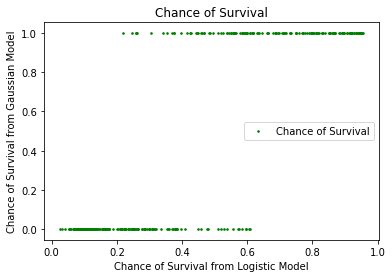

In [173]:
plt.scatter(logFate, gaussianFate, label= "Chance of Survival", color= "green", marker= ".", s=10) 
plt.xlabel('Chance of Survival from Logistic Model') 
plt.ylabel('Chance of Survival from Gaussian Model') 
plt.title('Chance of Survival') 
plt.legend() 
plt.show() 

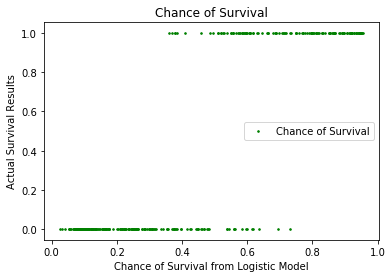

In [174]:
plt.scatter(logFate, result_data, label= "Chance of Survival", color= "green", marker= ".", s=10) 
plt.xlabel('Chance of Survival from Logistic Model') 
plt.ylabel('Actual Survival Results') 
plt.title('Logistic Results') 
plt.legend() 
plt.show() 

In [175]:
logisticBarGraph = [0, 0, 0, 0]
gaussianBarGraph = [0, 0, 0, 0]
for i in range(0,len(result_data)):
    if (result_data[i] == 1 and logisticResults[i] == 1):
        logisticBarGraph[0]+=1
    elif (result_data[i] == 0 and logisticResults[i] == 0):
        logisticBarGraph[1]+=1
    elif (result_data[i] == 0 and logisticResults[i] == 1):
        logisticBarGraph[2]+=1
    elif (result_data[i] == 1 and logisticResults[i] == 0):
        logisticBarGraph[3]+=1
for i in range(0,len(result_data)):
    if (result_data[i] == 1 and gaussianResults[i] == 1):
        gaussianBarGraph[0]+=1
    elif (result_data[i] == 0 and gaussianResults[i] == 0):
        gaussianBarGraph[1]+=1
    elif (result_data[i] == 0 and gaussianResults[i] == 1):
        gaussianBarGraph[2]+=1
    elif (result_data[i] == 1 and gaussianResults[i] == 0):
        gaussianBarGraph[3]+=1

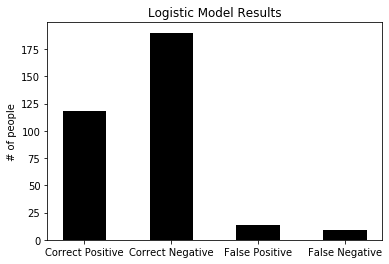

In [176]:
graph = [1, 3, 5, 7]
resultLabel = ['Correct Positive', 'Correct Negative', 'False Positive', 'False Negative']
plt.bar(graph, logisticBarGraph, tick_label = resultLabel, width = 1, color = ['black']) 
plt.ylabel('# of people') 
plt.title('Logistic Model Results') 
plt.show() 

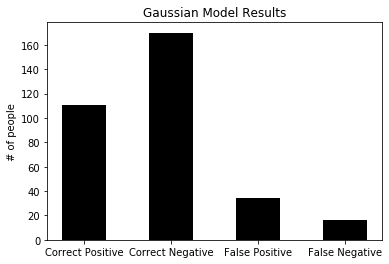

In [177]:
graph = [1, 3, 5, 7]
resultLabel = ['Correct Positive', 'Correct Negative', 'False Positive', 'False Negative']
plt.bar(graph, gaussianBarGraph, tick_label = resultLabel, width = 1, color = ['black']) 
plt.ylabel('# of people') 
plt.title('Gaussian Model Results') 
plt.show() 